Name: Lê Hoàng Anh Đức
ID: 11219268
Class: DSEB 63

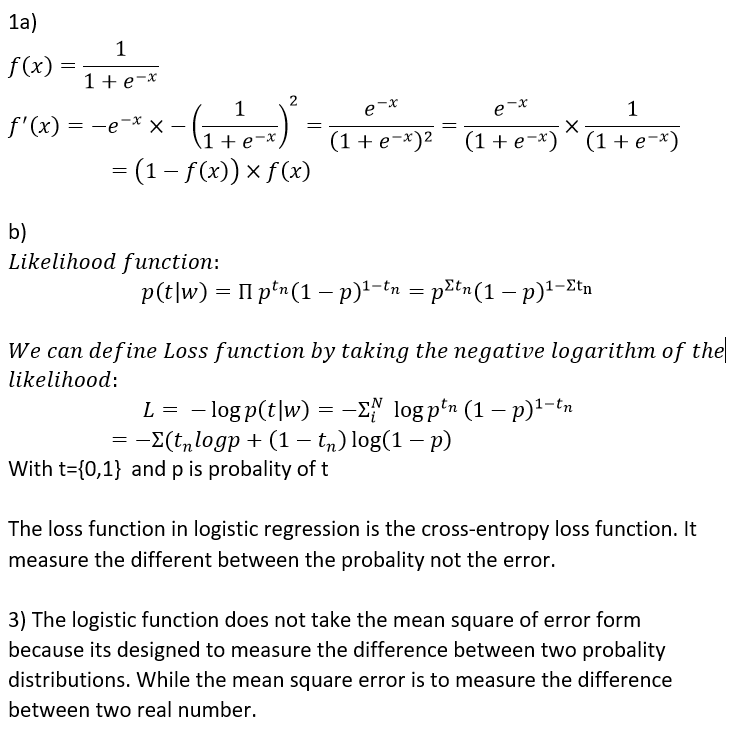

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.01, max_iter = 1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.theta = None
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1- y_true)* np.log(1-y_pred))
   
    def gradient(self, X, y_true):
        y_pred = self.sigmoid(X @ self.theta)
        return (y_pred - y_true) @ X
    
    def fit(self, X, y_true):
        self.theta = np.zeros(X.shape[1])
        for i in range(self.max_iter):
            gradient = self.gradient(X, y_true) 
            self.theta -= self.learning_rate * gradient
    def predict(self, X):
        y_pred = self.sigmoid(X @ self.theta)
        return np.where(y_pred >0.5, 1, 0)
    
    def accuracy(self, X, y_true):
        y_pred = self.predict(X)
        return np.mean(y_pred == y_true)
    

In [3]:
train = pd.read_csv('D:\\Năm 3 - HK1\\ML\\HW\\ds1_train.csv')
valid = pd.read_csv('D:\\Năm 3 - HK1\\ML\\HW\\ds1_valid.csv')

In [4]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:,-1]
X_valid, y_valid = valid.iloc[:, :-1], valid.iloc[:,-1]

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


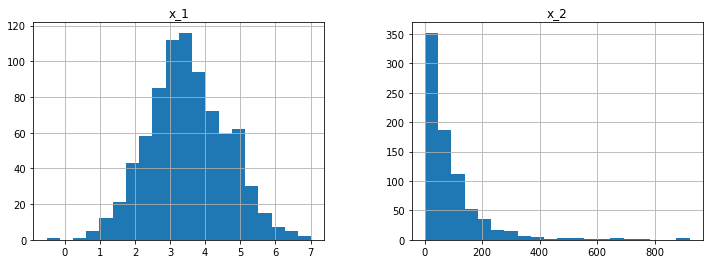

In [6]:
X_train.hist(bins=20,figsize = (12,4))
plt.show()

(200, 200)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13208\3797471731.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


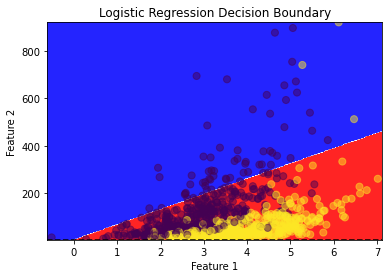

In [14]:
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X_train.iloc[:, 0].min() - 0.1, X_train.iloc[:, 0].max() + 0.1
y_min, y_max = X_train.iloc[:, 1].min() - 0.1, X_train.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict the labels for the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape((200,200))
print(Z.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap="bwr")
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, alpha=0.5)
plt.scatter(X_valid.iloc[:, 0], X_valid.iloc[:, 1], c=y_valid, s=50, alpha=0.5)

# Plot the decision boundary at y = 0.5
plt.plot([x_min, x_max], [0.5, 0.5], "k--")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()
